# Extract reviews by restaurant
                                                                                                                            jiho Yeo

## Extract restaurant id in Toronto

In [60]:
from utils.preprocess import JSONLoader
fields = ['business_id','categories','city']
# fields = None
city = ['Toronto']
categories_all =['Restaurants', 'Food', 'Sandwiches', 'Fast Food', 'American (Traditional)', 'Pizza',
                 'Italian', 'Burgers', 'Mexican','Breakfast & Brunch', 'American (New)', 'Chinese', 'Specialty Food', 'Bakeries', 'Desserts',
                 'Japanese', 'Ice Cream & Frozen Yogurt', 'Chicken Wings', 'Seafood', 'Salad', 'Sushi Bars',
                 'Asian Fusion', 'Thai', 'Indian']

business = 'business.json'
data_dir = 'C:/Users/USer/social data mining/Project/dataset/'
jl = JSONLoader(business, data_dir, fields = fields)
jl.set_condition(city=city, categories=categories_all)
f_b, all_restaurants = jl.sample(10000000)
print(len(all_restaurants))
all_rest_id = set([restaurant[0] for restaurant in all_restaurants])
print(len(all_rest_id))

8627
8627


In [26]:
# Load the reviews
review = 'review.json'
data_dir = 'C:/Users/USer/social data mining/Project/dataset/'
fields = ['business_id','text' ]
jl = JSONLoader(review, data_dir, fields = fields)
jl.set_condition(business_id = all_rest_id)

f_, all_reviews = jl.sample(10000000)
len(all_reviews)

312595

## Extract reviews by restaurant (list)


In [72]:

from collections import defaultdict
rv_by_rst = defaultdict(list)
for id, rv in all_reviews:
    rv_by_rst[id].append(rv)
    
rv_by_rst_list=[[id,rv] for id,rv in rv_by_rst.items()]
len(rv_by_rst_list)

8627

## Combine all reviews in one length by restaurant 

In [118]:
rv_by_rst_all = [[id,' '.join(review)] for id, review in rv_by_rst_list]

In [112]:
rv_by_rst_all[0:10]

[['mr4FiPaXTWlJ3qGzp4-7Yg',
  'I left Table 17 feeling very ambivalent. Meh as others would put it. Some things good somethings not so great but on the whole in between.\n\nThe room is simple, farmhouse chic: long harvest table, ornamental roosters and wooden chairs with cushions for seating. Sundays and Mondays they have a decent prix fix menu on offer or you can order a la carte from their shared plates menu. I went with the steak frites and salad off the table d\'hote. Spinach salad came nicely dressed though the dressing was plain could have used more tartness. I had a few slight issues with the steak frites, the steak came closer to medium when medium rare was requested and was under seasoned. My accompaniment of frites (which were wonderful btw) on the other hand was too liberally salted with kosher salt so I guess I got the best of both worlds! The Bearnaise sauce sauce on the side was so-so and didn\'t do too much to perk up the steak. Dessert was chilled rhubarb with creme ang

## Combine all reviews of whole restaurant and extract word 

전체 레스토랑의 전체 리뷰를 통으로 List로 만듬.<br>
이렇게 해서 word count를 하여, 어떠한 단어가 많이 쓰였는지를 눈으로 확인하고 카테고리 별로 분류하는 작업을 진행함.<br>
2억개의 length를 가지는 하나의벡터로 만듬

In [157]:
whole_review = ' '.join([x[1] for x in rv_by_rst_all])

In [169]:
len(whole_review)

212185989

In [565]:
# To raise the accuracy, we have to consider plural.
# 기존에 영헌씨가 작성한 코드에 있는 함수를 가져왔습니다. 

def toPlural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

In [95]:
import re, string

def eliminatePunctuation(text):
    out = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return out

## NLTK 라이브러리를 이용해서 가장 많이 나온 단어별로 정렬함.<br>
## 상위 500개의 단어를 뽑아서, 관련이 있는 명사들끼리 묶고, 중요해 보이는 형용사를 분류함

In [203]:
from nltk.text import Text
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#text=eliminatePunctuation(rv_by_rst_all[1][1]).lower()
text=eliminatePunctuation(whole_review[0:1000000]).lower() #총 2억개정도 중 이정도밖에 못함 (메모리 한계)
stopwords = stopwords.words('english')

tokens = [toPlural(word) for word in word_tokenize(text) if word not in stopwords]
textList = Text(tokens)

nltk.FreqDist(textList).most_common(500)

[('foods', 1111),
 ('places', 993),
 ('goods', 968),
 ('services', 684),
 ('likes', 628),
 ('greats', 613),
 ('ones', 563),
 ('reallies', 545),
 ('woulds', 493),
 ('times', 450),
 ('gos', 446),
 ('menus', 436),
 ('gets', 405),
 ('uses', 399),
 ('restaurants', 387),
 ('alsos', 381),
 ('backs', 376),
 ('ordereds', 351),
 ('burgers', 350),
 ('cames', 344),
 ('donts', 331),
 ('gots', 322),
 ('nices', 322),
 ('orders', 316),
 ('tables', 295),
 ('wells', 293),
 ('littles', 288),
 ('evens', 285),
 ('chickens', 283),
 ('deliciouses', 274),
 ('ives', 270),
 ('ims', 264),
 ('pretties', 261),
 ('comes', 256),
 ('didnts', 252),
 ('muches', 250),
 ('definitelies', 247),
 ('tries', 245),
 ('friendlies', 242),
 ('nights', 238),
 ('meals', 236),
 ('firsts', 232),
 ('peoples', 223),
 ('coulds', 221),
 ('bits', 217),
 ('freshes', 216),
 ('experiences', 215),
 ('bests', 214),
 ('betters', 213),
 ('nevers', 212),
 ('staffs', 209),
 ('thoughs', 208),
 ('twos', 208),
 ('dinners', 207),
 ('thinks', 205),
 ('

In [213]:
## 해당 단어가 문맥에서 어떻게 사용되었는지 확인해봄
textList.concordance("staffs")


Displaying 25 of 209 matches:
keeps comings backs weeklies coulds staffs supers lovelies ingredientses fresh
ushes fabricses feelses goods walks staffs visitses friendlies attentives time
nces everythings friendlies funnies staffs customs vegetarien dinners teenses 
ables 17s courses tableses arriveds staffs happies seats uses bars thankfullie
 minis veggies cubeses dishes nices staffs noticeds evens contemplateds gettin
easies saturdaies mornings servings staffs friendlies helpfuls loveds breads c
ens tables middles 2nds rooms waits staffs cuts breads gots servings suppliese
inis brunches impresseds friendlies staffs somewhats traditionals frenches bru
 nevers seemses needs bads priceses staffs seems miserables loyals customers f
s readings edies reviews mentionses staffs disableds personallies hadnts notic
s everythings cames fairlies quicks staffs responsives prices 35s thinks tonka
ikes standards ramens houses decors staffs friendlies youlls calls timeses usu
rvices excellents supe

## 분석 결과 및 현재까지의 시사점


**명사** <br>
 
foods, places, placeses,  services, menus, meals, staffs, drinks, drinkses, tastes, servers, areas, atmospheres, friendses, prices, priceses, meats, qualities, decors,  waitresses, waiters, locations, interiors costs 

>음식: foods menus meals drinks drinkses tastes meats qualities

>가격: prices priceses costs

>분위기: places placeses areas atmospheres decors interiors

>친절도: services staffs servers waitresses waiters



**형용사/동사** <br>

good, likes, nices, wells, deliciouses, pretties, friendlies, freshes, bests, betters, loves, amazings, tasties, spicies , recommends, specials, decents, worths, excellents, kinds perfects, flavours, favourites, awesomes, cheaps, flavourses impressed, reasonables, cleen, terribles, rudes, bads, wasnts disappointings

** 향후 진행계획**

1) Review를 sentence 단위로 분리
2) 위의 단어를 포함하는 sentence만 추출 (ex.'음식'에 들어있는 단어들이 포함된 sentence를 추출)
3) WordCloud를 통한 시각화 및 tf-idf를 사용한 점수 추출

추가제안) sentence 단위로 review를 쪼개서, 같은 sentence에 있는 단어들끼리 network를 만들어서, Price와 연결되어 있는 형용사를 보여주는 식으로 네트워크를 보여주면 어떨까요?


## -------------------------분석추가 (2017-11-28)-------------------------------

## Split reviews into sentence

위에서 추출한 4개의 카테고리 (음식, 가격, 분위기, 친절도)에 속한 단어들에 대해서 각 단어들이 속한 문장만을 리뷰에서 추출하는 작업을 진행
1. 모든 리뷰를 sentence 단위로 나눔 (** rv_by_rst_sent**)
2. sentence 단위로 나눈 리뷰 중, 각 카테고리에 속한 단어(ex.price,cost,prices,costs)를 포함하고 있는 문장만을 추출 (**rv_price**)

In [124]:
from nltk.tokenize import sent_tokenize
rv_by_rst_sent = [[id,sent_tokenize(review)] for id, review in rv_by_rst_all]

In [548]:
rv_by_rst_sent[4]

['tq_hA-LBU_NJLmXq-yVw9A',
 ['Ok food and great service.',
  'The owners, family and staff really make the difference.',
  'Duncan is a great host and a pleasure to talk to.',
  'Small but comfortable atmosphere.',
  'Gate 403 brings in wonderful jazz talent and they promote young talent.',
  'Keep up the great job!',
  'A very talented and musical friend of mine was playing a jazzy show here and I rarely if ever pass up an invite to hear live music.',
  "Almost every day of the week at Gate 403 you'll be sure to happen upon a few local jazz artists or bands who are simply playing their music for the love of it.",
  "Not only do I find this endearing, I also think it's perfect for those who wish to support local talent in Toronto.",
  'While Gate 403 is not a large space, it fits a nice crowd of people who are either there for the food or for the music.',
  'Both are safe bets if you ask me.',
  'Gate 403 is a mix between a pub and a piano bar and it seems to have something for everyon

In [528]:
# 레스토랑별 리뷰에서 가격과 연관된 단어만을 가지고 있는 문장을 추출함
price_related_word = ['price', 'prices', 'cost', 'costs']
rv_price = []
#my_sentence=[sent for sent in sentences if 'parking' in word_tokenize(sent)]
for x, y in rv_by_rst_sent[0:100]:
    tmp_review=[]
    for yy in y:
        if bool(set(word_tokenize(yy)) & set(price_related_word)):
            tmp_review.append(yy)
    rv_price.append([x,tmp_review])

In [530]:
rv_price[6]

['TAAlaXAk9sWOUXZW1-wfYQ',
 ['He price is definitely high for the cooking and taste of this restaurant.',
  'Including the cost of groupon it ended up being 50$ a person.',
  "Overall:\n\nThe groupon was cool due to different protein's that we got, but compared to the regular menu seemed just slightly under the normal cost.",
  "I don't know where $140 came from, but I really wouldn't have been able to justify that price.",
  "The food and service was good, the price is okay but it's definitely worth it if you go every so often for that experience.",
  'Excellent service provided by our host Shogu (spelt incorrectly), very friendly and accommodative to our requests for shifting us to a smaller table and making changes to the price fixed menu due to dietary requirements.',
  'Great prices & decor.',
  'We came for the lunch menu, which I think is a fair price (~$30 for two of us incl.']]

## word cloud 분석 수행 (가격에 대해)
1. sentence 단위로 나눠져있는 리뷰를 하나로 합침 (rv_price_sent_combine)
2. wordpunct_tokenize를 통해 합쳐진 리뷰를 다시 단어단위로 쪼갬 (wordcloud를 위해)
3. 시각화 해서 레스토랑별 표출

In [566]:
# 1. sentence 단위로 나눠져있는 리뷰를 하나로 합침 (rv_price_sent_combine)
rv_price_sent_combine = []
for res_id, reviews in rv_price:
    review=' '.join(reviews)
    rv_price_sent_combine.append([res_id,review])

In [532]:
rv_price_sent_combine[4]

['tq_hA-LBU_NJLmXq-yVw9A',
 'It was very small for $9 price tag that came with it (three pieces) and every ingredient tasted like it came from a can (think pizza pocket!) Beer prices are excellent (usually $2 below the Local across the street) and they know how to mix drinks - most of the time. First of all: they have an actual happy hour from monday to thursday, with the added bonus of half price appetizers til 6. Drinks are a fair price.']

In [568]:
# 2. wordpunct_tokenize를 통해 합쳐진 리뷰를 다시 단어단위로 쪼갬 (wordcloud를 위해)
# [restaurant id, [word1, word2, word3, word4 ....,]] 형식의 최종 데이터가 출력됨. word는 모두 가격과 연관된 문장의 단어임
rv_price_word=[]
for res_id,review_combine in rv_price_sent_combine:
    rv_rm_number = re.sub(r'\d+', '', review_combine)
    rv_price_word.append([res_id,[eliminatePunctuation(word).lower()
                                  for word in nltk.wordpunct_tokenize(rv_rm_number)
                                  if word not in stopwords and word not in price_related_word and len(word)>3]])
    
rv_price_word = [[x,list(filter(None,y))] for x,y in rv_price_word]

In [570]:
## 레스토랑별 많이 나오는 단어의 frequend plot
textList_price = Text(rv_price_word[0][1])

nltk.FreqDist(textList_price).most_common(20)

[('food', 4),
 ('menu', 4),
 ('point', 3),
 ('better', 3),
 ('mind', 2),
 ('great', 2),
 ('wine', 2),
 ('meal', 2),
 ('list', 2),
 ('could', 2),
 ('table', 2),
 ('going', 2),
 ('place', 2),
 ('well', 2),
 ('expected', 2),
 ('service', 2),
 ('full', 2),
 ('come', 2),
 ('sides', 2),
 ('know', 2)]

In [571]:
# word cloud를 통한 시각화 수행
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

restaurant id: mr4FiPaXTWlJ3qGzp4-7Yg


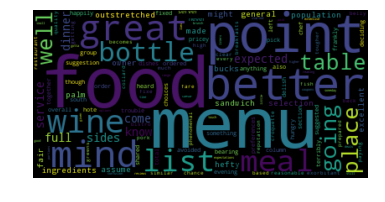

In [572]:
wordcloud_price = WordCloud().generate(' '.join(rv_price_word[0][1]))

plt.imshow(wordcloud_price, interpolation='bilinear')
plt.axis("off")

print ("restaurant id: %s"  % rv_price_word[0][0])

restaurant id: JB8-8TtNYX-vLqN7cz-zHA


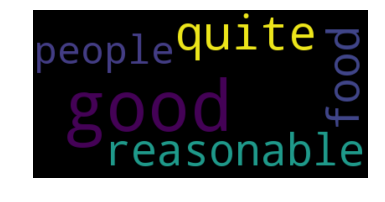

In [562]:
wordcloud_price = WordCloud().generate(' '.join(rv_price_word[1][1]))

plt.imshow(wordcloud_price, interpolation='bilinear')
plt.axis("off")

print ("restaurant id: %s"  % rv_price_word[1][0])

restaurant id: H3w5XeX-OO0Wk13fwLOybQ


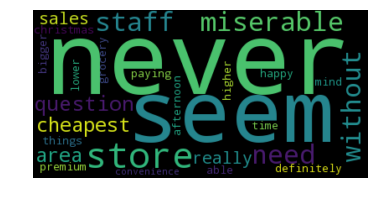

In [563]:
wordcloud_price = WordCloud().generate(' '.join(rv_price_word[2][1]))

plt.imshow(wordcloud_price, interpolation='bilinear')
plt.axis("off")

print ("restaurant id: %s"  % rv_price_word[2][0])